## SIMBA Beams Module examples

The `beam` module in SimFrame is a container for arbitrary 6-dimensional particle distributions, providing functions for reading and writing to and from various file formats for simulation codes, including [ASTRA](https://www.desy.de/~mpyflo/Astra_manual/Astra-Manual_V3.2.pdf), [GPT](https://pulsar.nl/) (via [easyGDF](https://github.com/electronsandstuff/easygdf)), [SDDS](https://ops.aps.anl.gov/manuals/SDDStoolkit/SDDStoolkit.html) (via [soliday.sdds](https://pypi.org/project/soliday.sdds/)), [Ocelot](https://github.com/ocelot-collab/ocelot), [Xsuite](https://github.com/xsuite), [OpenPMD](https://github.com/ChristopherMayes/openPMD-beamphysics) and an in-house HDF5 distribution.

Functions and properties are provided for obtaining:
* slice properties
* Twiss parameters
* beam centroids
* beam sigmas
* beam emittances
* kernel density estimator
* minimum volume ellipse

This notebook will show some of the functionality for loading in distributions, writing them to files, and plotting beam distributions and analysis.

First import the SIMBA `Beams` module and the plotting functions.

The test file is loaded from the repository.

In [3]:
import sys
sys.path.append('/home/xkc85723/Documents/simba')
import simba.Modules.Beams as rbf  # noqa E402
from simba.Modules.Beams.plot import (
    plotScreenImage,
    density_plot,
    marginal_plot,
    slice_plot,
)

In [4]:
testbeamlocation = './CLA-S02-DIA-SCR-03.openpmd.hdf5'
beam = rbf.beam(testbeamlocation)

In addition to the 6D phase space distribution [`x` (m), `y` (m), `z` (m) / `t` (s), `px` (kg*m/s), `py` (kg*m/s), `pz` (kg*m/s)] , the following properties are derived:
- `fullbeam` -- the transpose of the 6D array.
- [`xp`, `yp`] -- horizontal and vertical angular distributions.
- [`xc`, `xpc`, `yc`, `ypc`] -- horizontal and vertical positions and angular distributions, corrected for dispersion.
- [`cpx`, `cpy`, `cpz`] -- the beam momenta in eV/c.
- `deltap` -- fractional momentum deviation from the mean.
- [`p`, `cp`] -- total beam momentum in kg*m/s and eV/c, respectively.
- [`Ex`, `Ey`, `Ez`] -- beam energies in eV.
- [`Bx`, `By`, `Bz`] -- relativistic betas.
- `gamma` -- relativistic Lorentz factor.
- `Brho` -- magnetic rigidity.
- `BetaGamma` -- beam momentum as beta*gamma.
- [`kinetic_energy`, `mean_energy`] -- kinetic energy in J and its mean.
- `E0_eV` -- rest energy of the particles in eV.
- `Q` -- total charge of the bunch in C.

Note that only the base-level 6D distribution can be modified (along with attributes such as `toffset` and `total_charge`); all of the properties above are derived and cannot be set.

### Plotting beam parameters

Any of the array-like properties of the `beam` object can be plotted using the three functions defined below.

<Axes: xlabel='z (mm)', ylabel='cpz (keV/c)'>

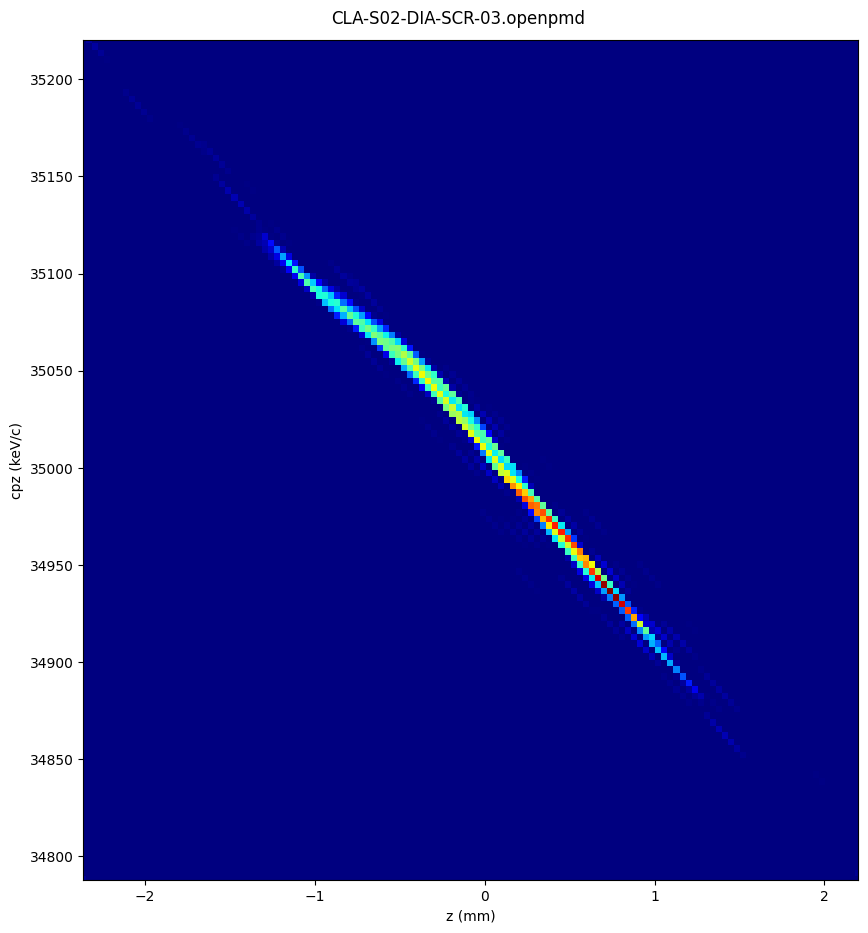

In [5]:
plotScreenImage(beam, keys=["z", "cpz"], subtract_mean=[True, False])

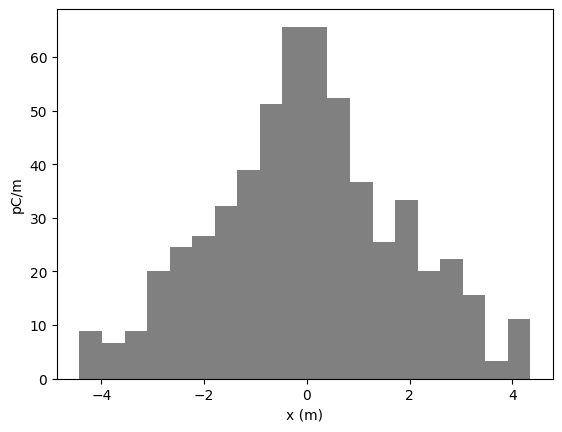

In [6]:
density_plot(beam, key="x", bins=20)

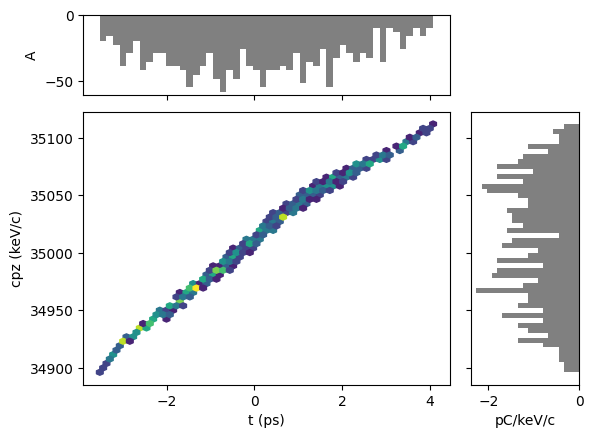

In [7]:
marginal_plot(beam, key1="t", key2="cpz", bins=50, subtract_mean=[True, False])

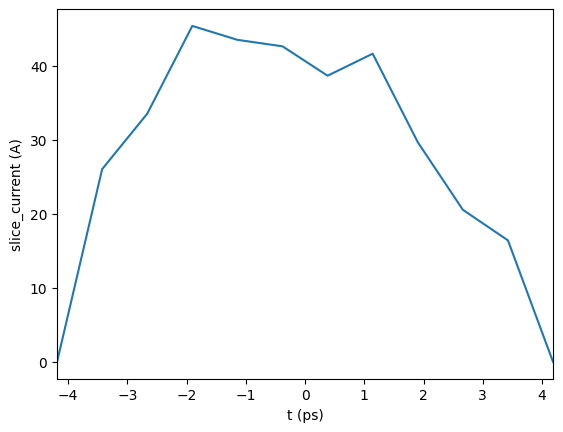

In [11]:
slice_plot(beam, bins=10)

### Derived objects from the distribution

Once a distribution is loaded, the `beam` object will calculate the emittance, Twiss, and so on, with the following properties defined therein.

In [12]:
beam.Particles.model_dump()

{'Q': 250.0000000000001 pC,
 'x': array([ 3.84012607e-06,  1.24709072e-04, -6.53576034e-04,  3.63362210e-04,
        -2.17527257e-03,  4.08700903e-04, -2.56052705e-03,  1.42263885e-03,
         4.23819774e-03,  1.49548872e-03,  3.43928836e-03,  2.75204847e-05,
        -4.60962054e-04,  2.97270433e-03, -1.47440009e-03, -9.73810902e-04,
         2.03861975e-03, -4.02725043e-04,  2.21416480e-05, -1.37148719e-03,
        -3.66777700e-03,  3.09407193e-03,  1.14202147e-03,  9.23852830e-04,
         1.85029882e-03, -1.53588540e-03, -2.35215119e-03, -2.18535575e-03,
        -7.52776809e-04,  2.77055096e-03, -9.05148287e-04,  1.52677663e-04,
        -2.61296122e-03,  3.27244012e-03,  2.96092847e-03,  1.78582148e-03,
         1.69790656e-03, -9.68602460e-04, -7.21478671e-04,  2.41547914e-03,
        -5.72784509e-04, -1.26640109e-03, -2.85861761e-03,  4.87730543e-04,
         5.17705647e-04, -3.43664592e-04, -9.93478035e-05,  4.34983621e-03,
        -3.58310297e-03, -1.40817920e-03,  2.19725178e-

In [13]:
beam.Particles.emittance.model_dump()

{'ex': 174.09858753209383 nrad*m,
 'ey': 196.1049044674848 nrad*m,
 'enx': 11.928836982710356 µrad*m,
 'eny': 13.436659481636406 µrad*m,
 'ecx': 174.08724977827632 nrad*m,
 'ecy': 194.84363413737034 nrad*m,
 'ecnx': 11.928061562116598 µrad*m,
 'ecny': 13.350241708896782 µrad*m,
 'normalized_horizontal_emittance': 11.928838399166315 µrad*m,
 'normalized_vertical_emittance': 13.436661077134476 µrad*m,
 'horizontal_emittance': 174.09858753209383 nrad*m,
 'vertical_emittance': 196.1049044674848 nrad*m,
 'horizontal_emittance_90': 906.3832287336161 nrad*m,
 'normalized_horizontal_emittance_90': 62.096690935635905 µrad*m,
 'vertical_emittance_90': 1.0341899610614655 µrad*m,
 'normalized_vertical_emittance_90': 70.85278317704308 µrad*m,
 'horizontal_emittance_corrected': 174.08724977827632 nrad*m,
 'vertical_emittance_corrected': 194.84363413737034 nrad*m,
 'normalised_horizontal_emittance_corrected': 11.928061562116598 µrad*m,
 'normalised_vertical_emittance_corrected': 13.350241708896782 µr

In [14]:
beam.Particles.twiss.model_dump()

{'normalized_horizontal_emittance': 11.928838399166315 µrad*m,
 'normalized_vertical_emittance': 13.436661077134476 µrad*m,
 'horizontal_emittance': 174.09858753209383 nrad*m,
 'vertical_emittance': 196.1049044674848 nrad*m,
 'horizontal_emittance_corrected': 174.08724977827632 nrad*m,
 'vertical_emittance_corrected': 194.84363413737034 nrad*m,
 'beta_x': 18.84877195823276 m/rad,
 'alpha_x': 1.193974461783896 rad^-1/m,
 'gamma_x': 0.1286861033051388 rad/m,
 'beta_y': 52.747359809450934 m/rad,
 'alpha_y': -7.543884036036961 rad^-1/m,
 'gamma_y': 1.097878387816433 rad/m,
 'beta_x_corrected': 18.847571321953417 m/rad,
 'alpha_x_corrected': 1.1938848622097344 rad^-1/m,
 'gamma_x_corrected': 0.12868294926617554 rad/m,
 'beta_y_corrected': 53.08380763573523 m/rad,
 'alpha_y_corrected': -7.593104330038315 rad^-1/m,
 'gamma_y_corrected': 1.1049552769338418 rad/m,
 'eta_x': 0.013340593680719525 m,
 'eta_xp': -919.4879600646053 µrad,
 'eta_y': 0.020277140256491067 m,
 'eta_yp': -1.56206599928649

In [15]:
beam.Particles.sigmas.model_dump()

{'sigma_x': 1.8115034017751281 mm,
 'sigma_y': 3.216211429048846 mm,
 'sigma_t': 1.9002308373657044 ps,
 'sigma_z': 569.6141711291078 µm,
 'sigma_px': 2.801888062189512 ykg*m/s,
 'sigma_py': 8.679082455484542 ykg*m/s,
 'sigma_pz': 28.844075405565082 ykg*m/s,
 'sigma_cp': 53.918563091267316 keV/c,
 'sigma_cp_eV': 53.918563091267316 keV/c,
 'Sx': 1.8115034017751281 mm,
 'Sy': 3.216211429048846 mm,
 'Sz': 569.6141711291078 µm,
 'St': 1.9002308373657044 ps,
 'momentum_spread': 53.918563091267316 keV/c,
 'linear_chirp_t_cpz': -8.781475645772638 ac/eV,
 'linear_chirp_t_pz': -16.43152267263281 Gs/kg/m,
 'linear_chirp_z': -105.9598271810107 p}

In [16]:
beam.Particles.centroids.model_dump()

{'mean_x': -9.469452800676454 µm,
 'mean_y': -79.31028735907547 µm,
 'mean_t': 21.644981711285823 ns,
 'mean_z': 6.489002270393042 m,
 'mean_cpx': -30.324421765187047 eV/c,
 'mean_cpy': -595.7111651581272 eV/c,
 'mean_cpz': 35.00874585117013 MeV/c,
 'mean_px': -1.6206238247575812e-26 kg*m/s,
 'mean_py': -3.1836508356366553e-25 kg*m/s,
 'mean_pz': 18.709675007364343 zkg*m/s,
 'mean_energy': 35.51974895818066 MeV,
 'mean_gamma': 68.51771255304351 ,
 'mean_cp': 35.00875000818449 MeV/c,
 'Cx': -9.469452800676454 µm,
 'Cy': -79.31028735907547 µm,
 'Cz': 6.489002270393042 m,
 'Ct': 21.644981711285823 ns,
 'Cp': 35.00875000818449 MeV/c,
 'Cpx': -30.324421765187047 eV/c,
 'Cpy': -595.7111651581272 eV/c,
 'Cpz': 35.00874585117013 MeV/c,
 'Cxp': -864.0144434704091 nrad,
 'Cyp': -17.01235281354686 µrad,
 'Cgamma': 68.51771255304351 ,
 'Ccp': 35.00875000818449 MeV/c,
 'CEn': 35.51974895818066 MeV}

### Reading and writing to and from different simulation code formats

The `beam` object can load in and write to different file formats. The examples below show how to do this, and as a sanity check we can plot the beam distribution to check that it is the same after transforming.

In [20]:
astrabeamlocation = testbeamlocation.replace('openpmd.hdf5', 'astra')
sddsbeamlocation = testbeamlocation.replace('openpmd.hdf5', 'sdds')
ocelotbeamlocation = testbeamlocation.replace('openpmd.hdf5', 'ocelot.npz')
gptbeamlocation = testbeamlocation.replace('openpmd.hdf5', 'gdf')
beam.write_astra_beam_file(filename=astrabeamlocation)
beam.write_gdf_beam_file(filename=gptbeamlocation)
beam.write_ocelot_beam_file(filename=ocelotbeamlocation)
beam.write_SDDS_beam_file(filename=sddsbeamlocation)

In [21]:
astrabeam = rbf.beam(astrabeamlocation)
sddsbeam = rbf.beam(sddsbeamlocation)
ocelotbeam = rbf.beam(ocelotbeamlocation)
gptbeam = rbf.beam(gptbeamlocation)

<Axes: xlabel='z (mm)', ylabel='cpz (keV/c)'>

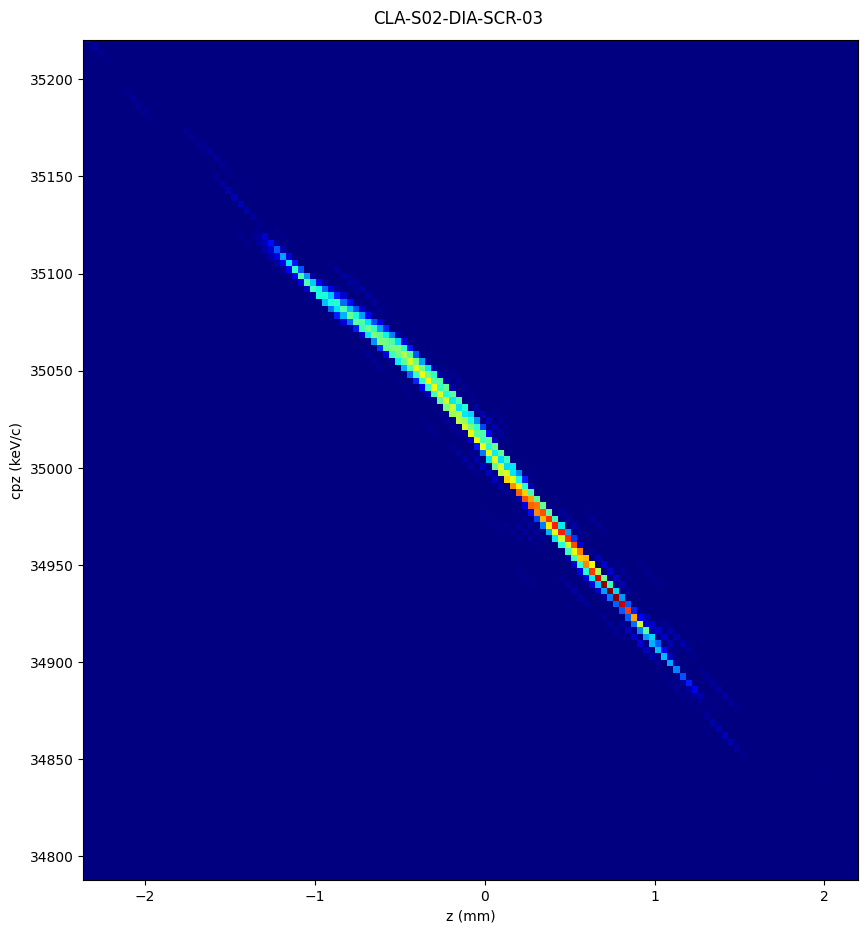

In [23]:
plotScreenImage(gptbeam, keys=["z", "cpz"], subtract_mean=[True, False])

In [25]:
import os
for ext in ["astra", "ocelot.npz", "sdds", "gdf"]:
    os.remove(testbeamlocation.replace('openpmd.hdf5', ext))